In [11]:
import numpy as np 
 
import pandas as pd 


In [12]:
import jax
import jax.numpy as jnp


def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return jnp.maximum(q * e, (q - 1.0) * e)

In [4]:
fp = r'D:\Projects\USA\all_GNSS.xlsx'

ex = pd.read_excel(fp)

In [14]:
ex.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'station_name', 'lat', 'long',
       'height_of_station_above_sea_level', 'year', 'month', 'day', 'pwv',
       'pwv_mean', 'pwv_Era5', 'pwv_mean_Era5', 'ZTD', 'ZTD_mean'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import os


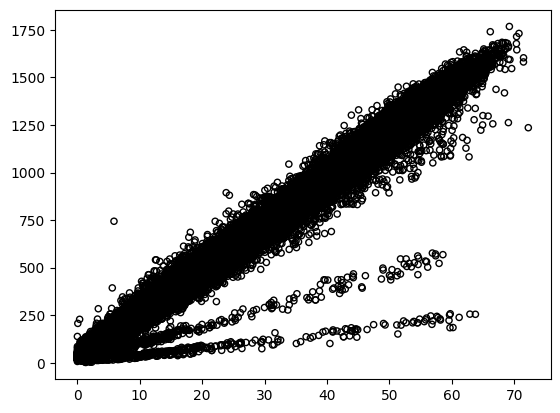

In [11]:
x = ex['pwv_mean']
y = ex['pwv_Era5']
fig = plt.figure()
plt.scatter(x, y, s=20, facecolors="none", edgecolors="k")


In [9]:
def calculate_error(q , y_true , y_pred):
    y_true = np.linspace(10, 20, 100)
    y_pred = np.linspace(10, 20, 200)

    loss = jax.vmap(quantile_loss, in_axes=(None, None, 0))(q, y_true, y_pred)
    loss = loss.mean(axis=1)

    return y_true, y_pred, loss

def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return jnp.maximum(q * e, (q - 1.0) * e) 

In [10]:
q = 0.8
y_true, y_pred, loss = calculate_error(q)
q_true = np.quantile(y_true, q)


In [17]:
y_true = ex['pwv_mean'].values
y_pred = ex['pwv_Era5'].values


In [26]:
Loss = quantile_loss(  0.95 ,  y_true, y_pred)
Loss.sum()

Array(8472.945, dtype=float32)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



In [19]:
mod = smf.quantreg("pwv_Era5 ~ pwv_mean + year", ex)
res = mod.fit(q=0.5)


c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [20]:
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:               pwv_Era5   Pseudo R-squared:               0.9152
Model:                       QuantReg   Bandwidth:                       1.801
Method:                 Least Squares   Sparsity:                        52.85
Date:                Wed, 15 May 2024   No. Observations:               212748
Time:                        13:58:32   Df Residuals:                   212745
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    639.4024     83.289      7.677      0.000     476.158     802.647
pwv_mean      23.9423      0.004   6255.970      0.000      23.935      23.950
year          -0.3131      0.041     -7.598      0.000      -0.394      -0.232

The condition number is large, 2.94e+06. This might

In [17]:
f"y_var~ {' + '.join(ex.columns[1:])} "

'y_var~ Unnamed: 0 + station_name + lat + long + height_of_station_above_sea_level + year + month + day + pwv + pwv_mean + pwv_Era5 + pwv_mean_Era5 + ZTD + ZTD_mean '

In [12]:
mod = smf.quantreg("pwv_Era5 ~ pwv_mean , year", ex)
res = mod.fit(q=0.5)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:               pwv_Era5   Pseudo R-squared:               0.9152
Model:                       QuantReg   Bandwidth:                       1.801
Method:                 Least Squares   Sparsity:                        52.83
Date:                Wed, 15 May 2024   No. Observations:               212748
Time:                        13:30:21   Df Residuals:                   212746
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5402      0.087     75.226      0.000       6.370       6.711
pwv_mean      23.9422      0.004   6258.042      0.000      23.935      23.950


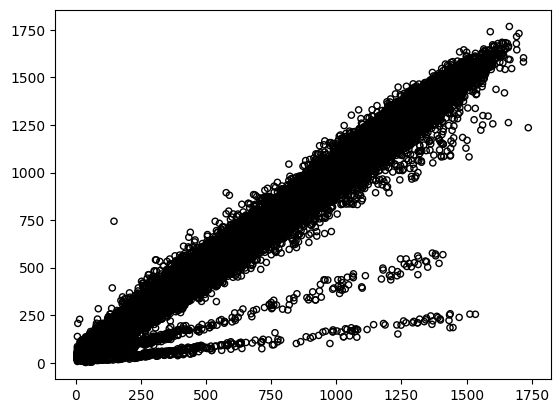

In [13]:
y_ = res.predict(x)
fig = plt.figure()
plt.scatter(y_, y, s=20, facecolors="none", edgecolors="k") 

In [19]:
from sklearn.linear_model import LinearRegression , QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


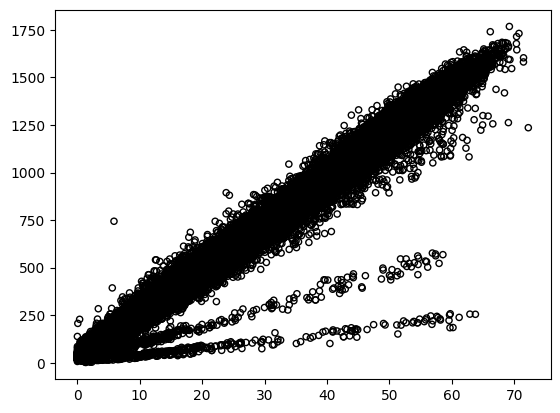

In [27]:
x = ex['pwv_mean'].values
y = ex['pwv_Era5'].values
fig = plt.figure()
plt.scatter(x, y, s=20, facecolors="none", edgecolors="k")

In [25]:

linear_regression = LinearRegression()
quantile_regression = QuantileRegressor(quantile=0.5, alpha=0, solver='highs-ds')

In [29]:
y_pred_qr = quantile_regression.fit(x, y).predict(x)
